<a href="https://colab.research.google.com/github/MARCOBRAYANGONZALEZGONZALEZ/EDP-I-EJERCICIOS-/blob/main/integral_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

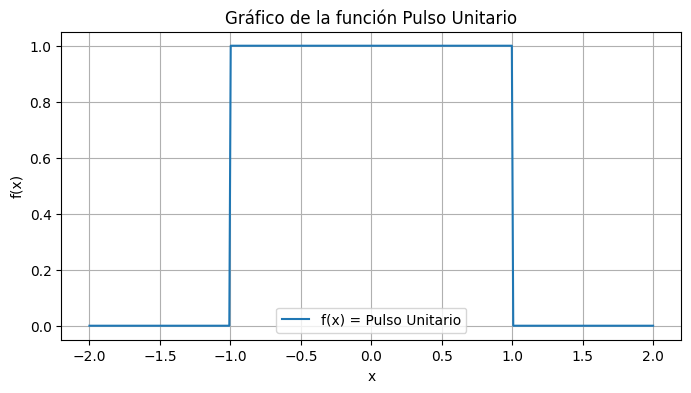

In [ ]:
# a) Graficar la función pulso unitario
import matplotlib.pyplot as plt
import numpy as np

def pulso_unitario(x):
    return 1 if -1 <= x <= 1 else 0

x_vals = np.linspace(-2, 2, 400)
y_vals = [pulso_unitario(x) for x in x_vals]

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = Pulso Unitario')
plt.title('Gráfico de la función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


A(w) = Piecewise((2*sin(w)/w, Ne(w, 0)), (2, True))/pi
B(w) = 0


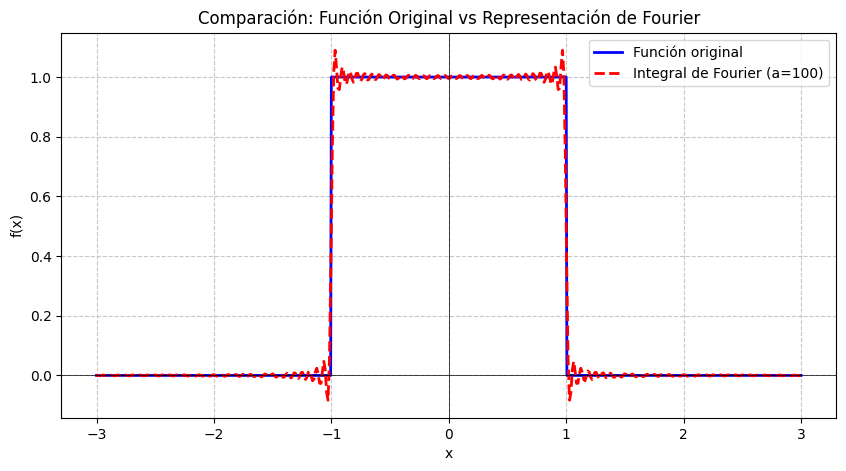

In [ ]:
#Inciso b):
# Definición de variables simbólicas
x_sym = sp.symbols('x', real=True)
w = sp.symbols('w', real=True)

# Cálculo de los coeficientes
A_w = (1/sp.pi) * sp.integrate(sp.cos(w*x_sym), (x_sym, -1, 1))
B_w = (1/sp.pi) * sp.integrate(sp.sin(w*x_sym), (x_sym, -1, 1))

print("A(w) =", A_w)
print("B(w) =", B_w)

# Convertir la expresión simbólica a función numérica
A_w_func = sp.lambdify(w, A_w, 'numpy')

# Función para calcular la integral de Fourier aproximada
def fourier_approx(x_val, a):
    integrand = lambda w_val: A_w_func(w_val) * np.cos(w_val * x_val)
    from scipy.integrate import quad
    result, _ = quad(integrand, 0, a)
    return result

# Vectorizar la función para poder evaluar arrays
fourier_approx_vec = np.vectorize(fourier_approx)

# Crear datos para el gráfico
x_vals = np.linspace(-3, 3, 500)
a_inf = 100  # Valor grande para aproximar infinito
y_fourier = fourier_approx_vec(x_vals, a_inf)

# Gráfico comparativo
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', linewidth=2, label='Función original')
plt.plot(x_vals, y_fourier, 'r--', linewidth=2, label='Integral de Fourier (a=100)')
plt.title('Comparación: Función Original vs Representación de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

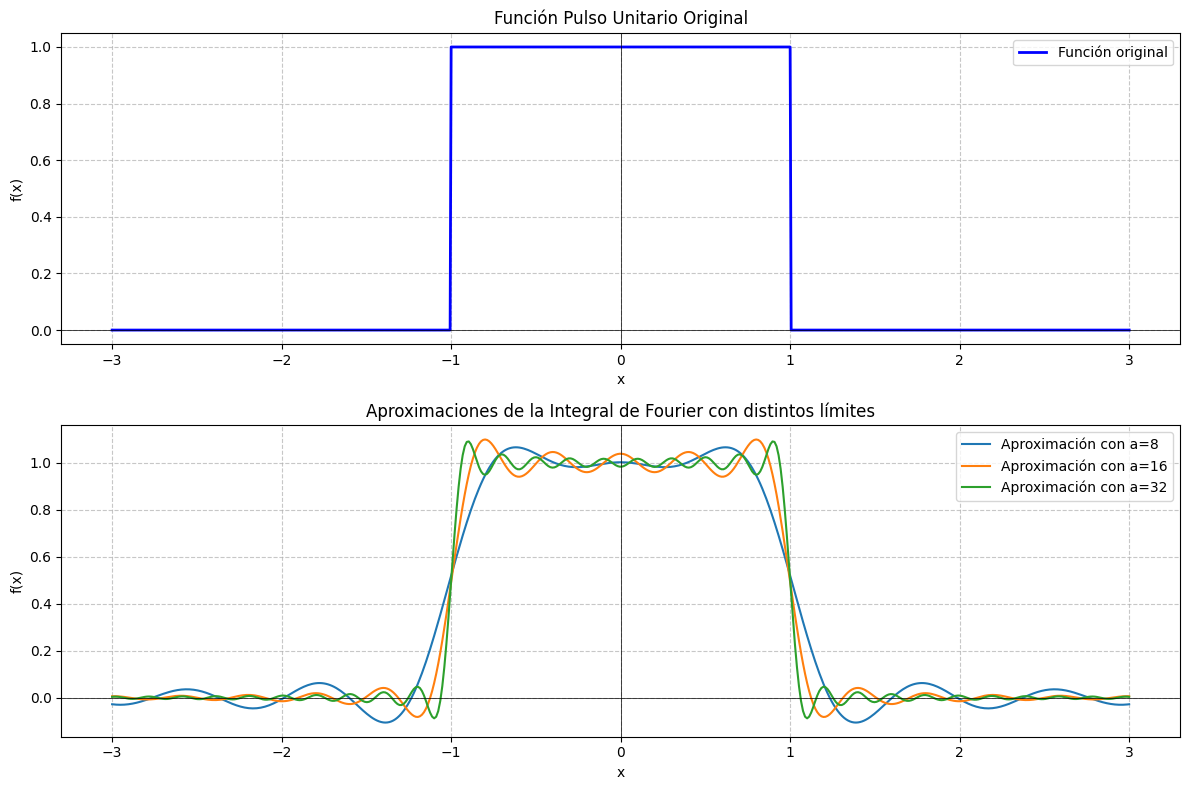

In [ ]:
# Valores de a a considerar
a_values = [8, 16, 32]

# Crear gráficos
plt.figure(figsize=(12, 8))

# Gráfico de la función original
plt.subplot(2, 1, 1)
plt.plot(x, y, 'b-', linewidth=2, label='Función original')
plt.title('Función Pulso Unitario Original')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Gráfico de las aproximaciones
plt.subplot(2, 1, 2)
for a in a_values:
    y_approx = fourier_approx_vec(x_vals, a)
    plt.plot(x_vals, y_approx, label=f'Aproximación con a={a}')

plt.title('Aproximaciones de la Integral de Fourier con distintos límites')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()